## Practice Bike Rental
Goal: Predict the total count of bikes rented during each hour using the test dataset.
    
Dataset : https://www.kaggle.com/marklvl/bike-sharing-dataset.
        
Content:

    instant: Record index
    dteday: Date
    season: Season (1:springer, 2:summer, 3:fall, 4:winter)
    yr: Year (0: 2011, 1:2012)
    mnth: Month (1 to 12)
    hr: Hour (0 to 23)
    holiday: weather day is holiday or not (extracted from Holiday Schedule)
    weekday: Day of the week
    workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
    weathersit: (extracted from Freemeteo)
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)
    atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)
    hum: Normalized humidity. The values are divided to 100 (max)
    windspeed: Normalized wind speed. The values are divided to 67 (max)
    casual: count of casual users
    registered: count of registered users
    cnt: count of total rental bikes including both casual and registered


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings('ignore')

### EDA and Visualizations

In [2]:
# import dataset
train = pd.read_csv("train_bikes.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


<AxesSubplot:xlabel='season', ylabel='count'>

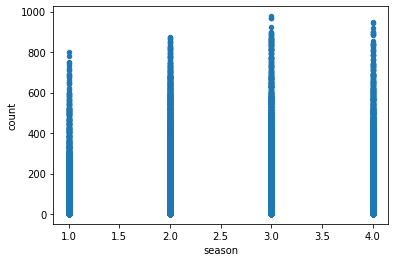

In [5]:
train.plot.scatter(x='season', y='count')

In [6]:
train.season.unique()

array([1, 2, 3, 4])

<AxesSubplot:xlabel='holiday', ylabel='count'>

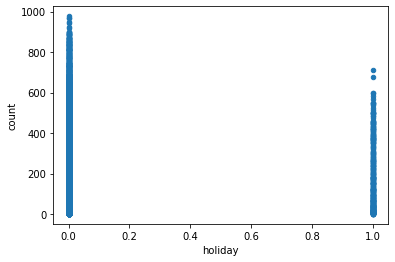

In [7]:
train.plot.scatter(x='holiday', y='count')

<AxesSubplot:xlabel='workingday', ylabel='count'>

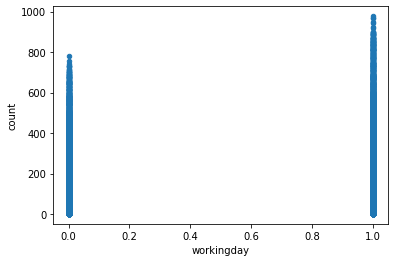

In [8]:
train.plot.scatter(x='workingday', y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

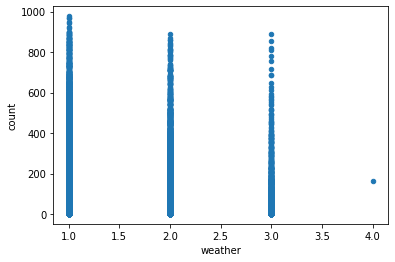

In [9]:
train.plot.scatter(x='weather', y='count')

In [10]:
train.weather.unique()

array([1, 2, 3, 4])

<AxesSubplot:xlabel='temp', ylabel='count'>

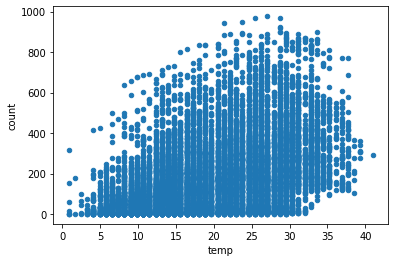

In [11]:
train.plot.scatter(x='temp', y='count')

<AxesSubplot:xlabel='atemp', ylabel='count'>

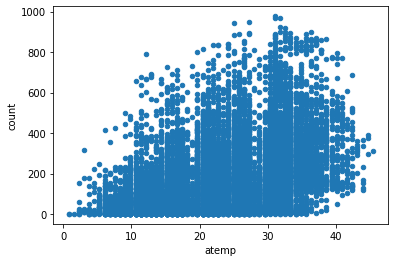

In [12]:
train.plot.scatter(x='atemp', y='count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

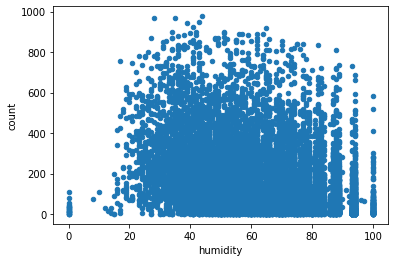

In [13]:
train.plot.scatter(x='humidity', y='count')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

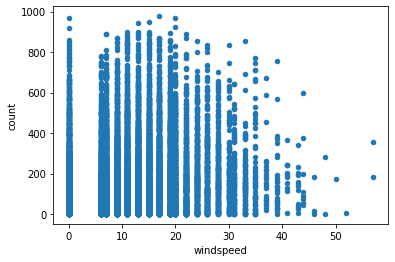

In [14]:
train.plot.scatter(x='windspeed', y='count')

<AxesSubplot:xlabel='casual', ylabel='count'>

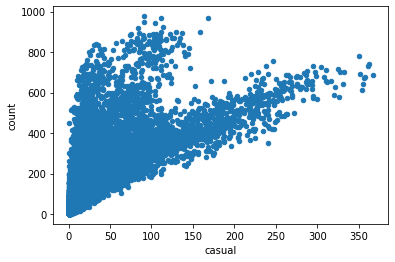

In [15]:
train.plot.scatter(x='casual', y='count')

<AxesSubplot:xlabel='registered', ylabel='count'>

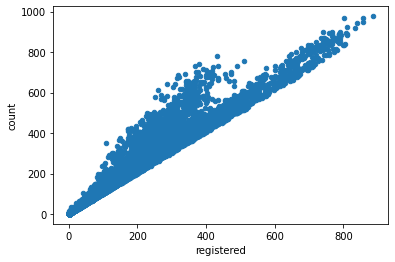

In [16]:
train.plot.scatter(x='registered', y='count')

In [17]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [18]:
# Null values
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [19]:
test = pd.read_csv('test_bikes.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [21]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [22]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [23]:
train.isnull().values.any()

False

In [24]:
train.datetime.dt.year.unique()

array([2011, 2012])

### Histograms 

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

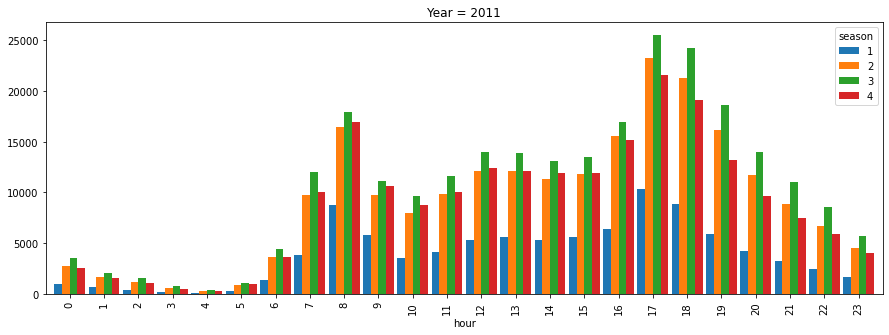

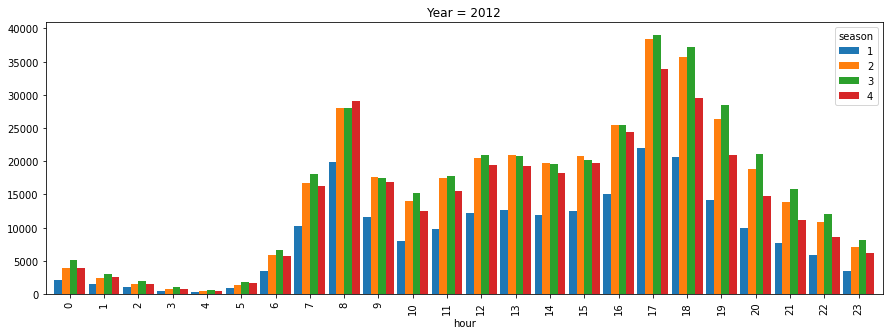

In [25]:
# Plotting count based on hour fora a given year
def plot_by_hour(data, year=None, column=str, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', column])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011, column='season') # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012, column='season') # plotting the count plot based on hour for 2012

As expected, the number of bike commuters is higher in summer (2) and autumm (3). I suspect the code 1 belongs to winter season, do to the reduction of rental... but let's follow the rules.

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

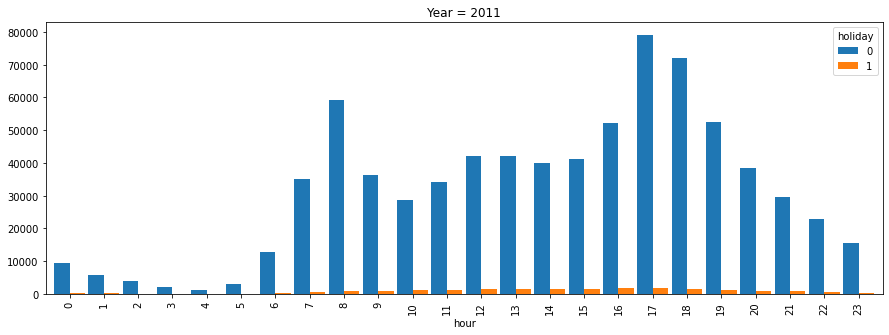

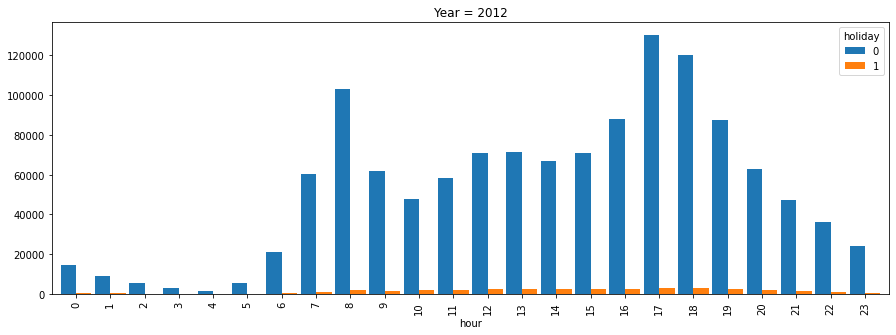

In [26]:
plot_by_hour(train, year=2011, column='holiday')
plot_by_hour(train, year=2012, column='holiday')

During holidays (1), the number of commuters dramatically decreases.

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

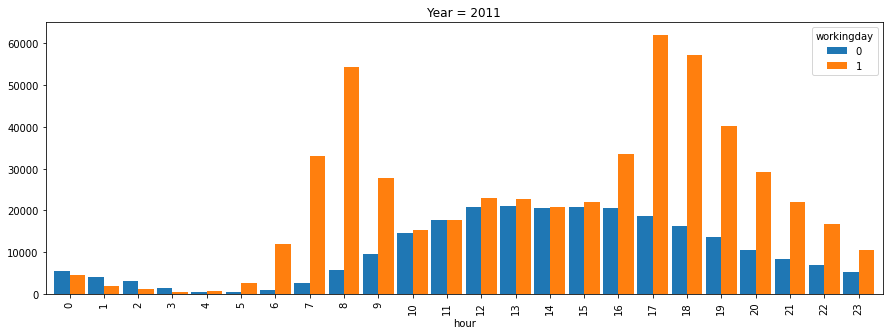

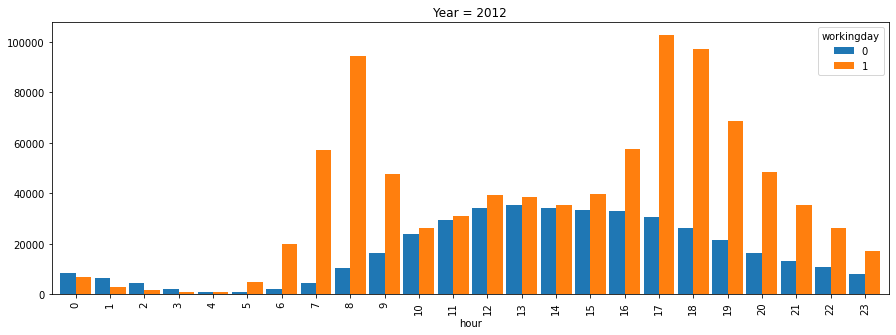

In [27]:
plot_by_hour(train, year=2011, column='workingday')
plot_by_hour(train, year=2012, column='workingday')

The rentals increase during the weekend (workingday = 1), following the rush hour pattern.

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

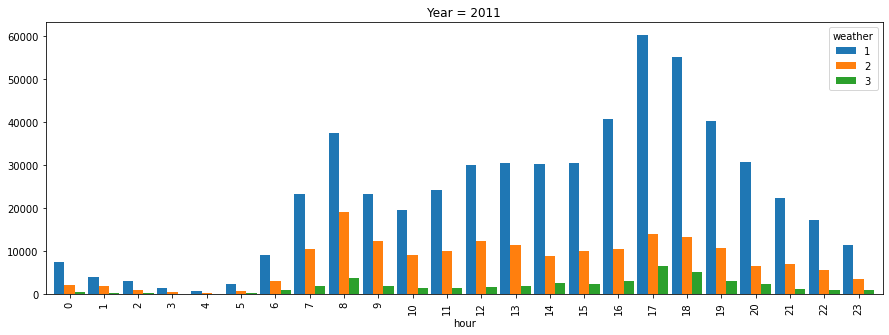

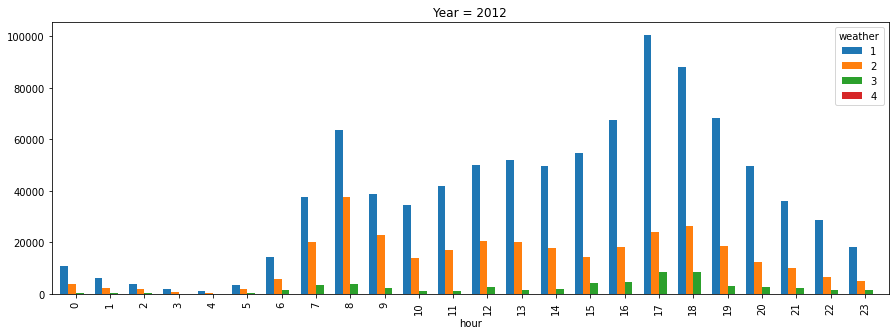

In [28]:
plot_by_hour(train, year=2011, column='weather')
plot_by_hour(train, year=2012, column='weather')

The rental are highly related with weather: Sunny (1) and Cloudy (2).

<AxesSubplot:title={'center':'Rent bike per hour'}, xlabel='hour'>

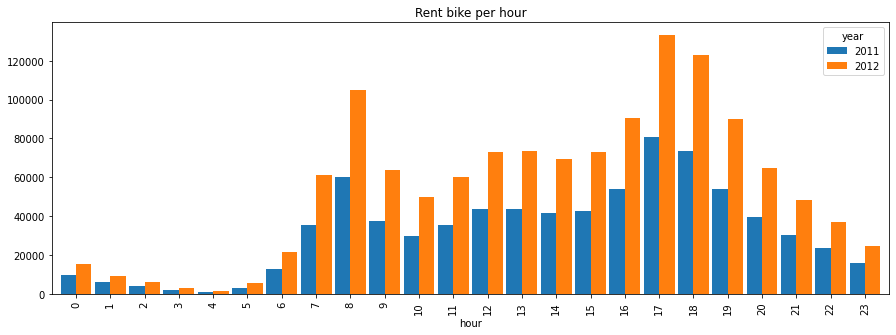

In [29]:
# Comparing years
def plot_by_year(attr, title):
    dd = train.copy()
    dd['hour'] = dd.datetime.dt.hour
    dd['year'] = dd.datetime.dt.year
    dd['month'] = dd.datetime.dt.month
    dd['day'] = dd.datetime.dt.day
    by_year = dd.groupby([attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)

plot_by_year('hour', 'Rent bike per hour')

The bike rentals follow the rush hour pattern: pics between 7:00-9:00 and between 17:00-19:00.

<AxesSubplot:title={'center':'Rental bike per day'}, xlabel='day'>

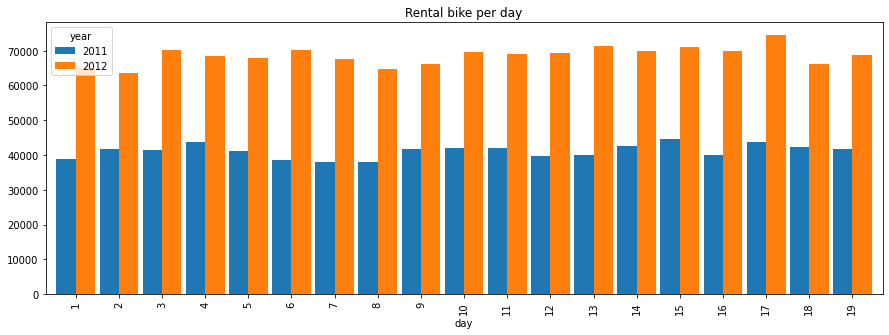

In [30]:
plot_by_year('day', 'Rental bike per day')

The number of rentals is constant during the working days.

<AxesSubplot:title={'center':'Rental bike per month'}, xlabel='month'>

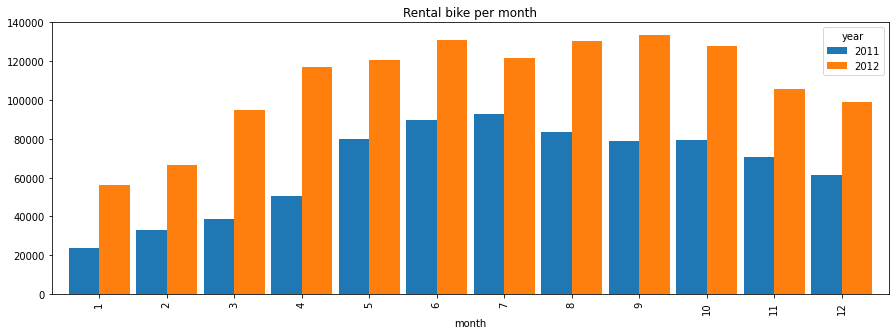

In [31]:
plot_by_year('month', 'Rental bike per month')

The number of rentals are higher in 2012.

### Boxplots

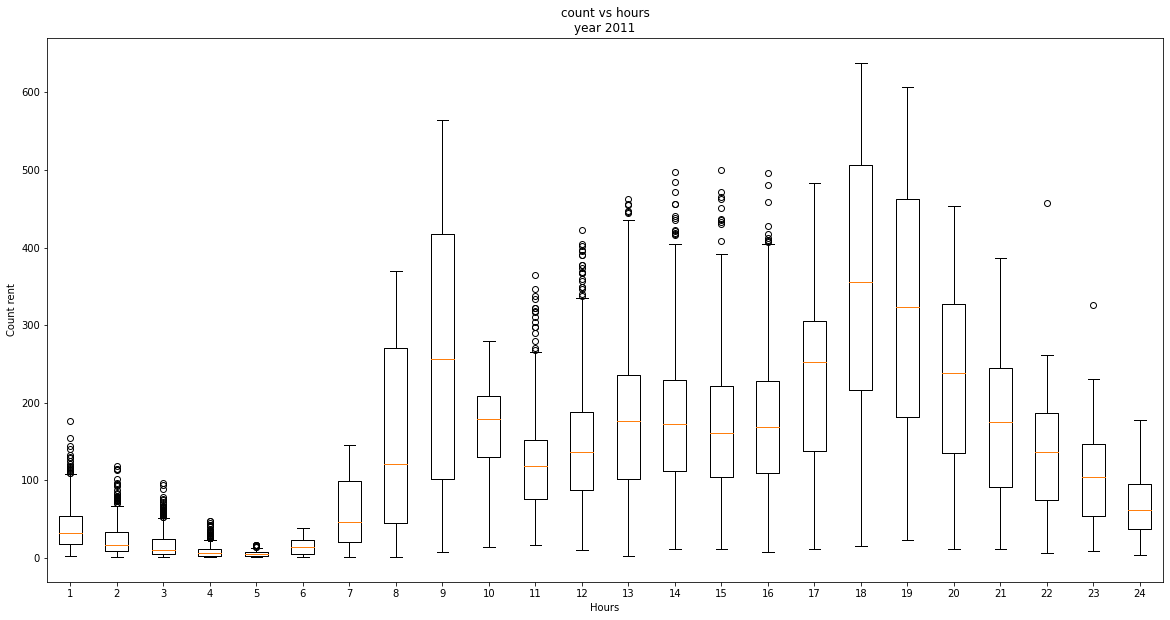

In [32]:
def plot_hours(data, year=None, message = ''):
    dd = data.copy()
    if year: dd = dd[ dd.datetime.dt.year == year ]
    #dd.loc[:,('hour')] = data.datetime.dt.hour # extracting the hour
    dd['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()

plot_hours(train, year=2011, message='year 2011')

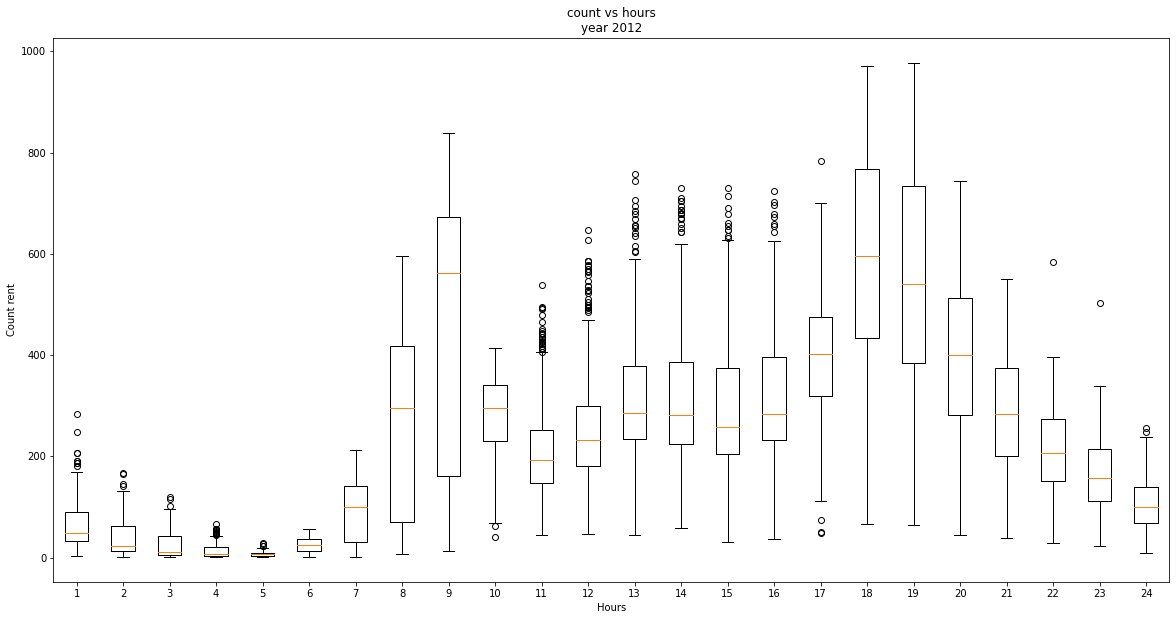

In [33]:
plot_hours(train, year=2012, message='year 2012')

In [34]:
# Including datetime in train and test datasets
dt = pd.to_datetime(train['datetime'])

# Including hour as column
train['hour'] = dt.map(lambda x: x.hour)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [35]:
dt_test = pd.to_datetime(test['datetime'])
test['hour'] = dt_test.map(lambda x: x.hour)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


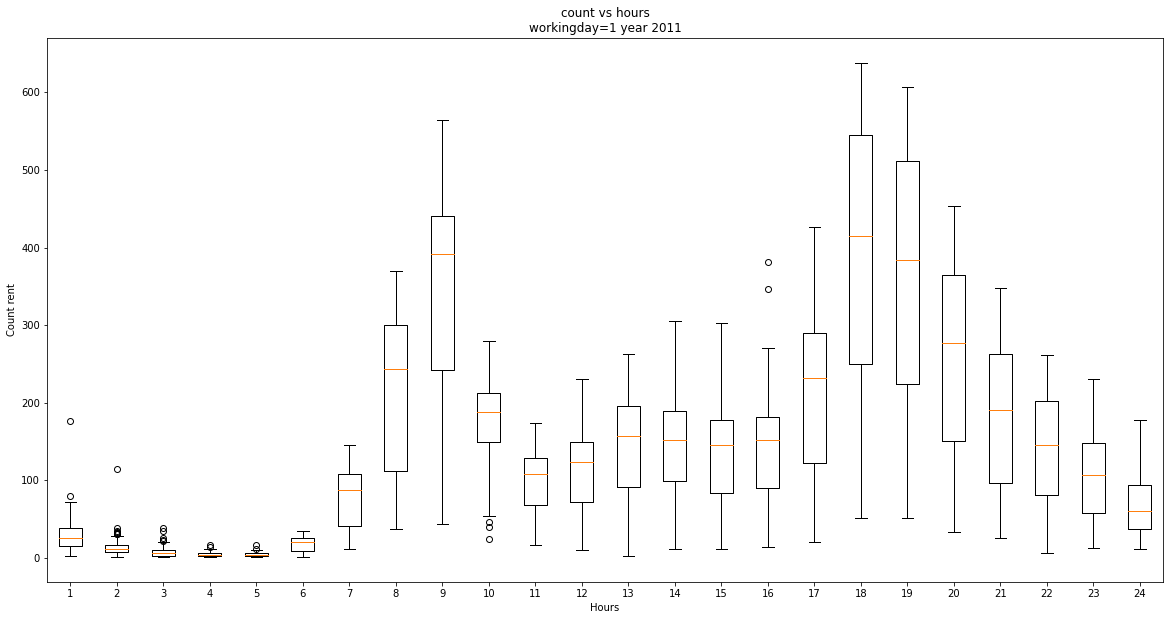

In [36]:
# Now we can filter features for boxplots
plot_hours(train[train.workingday == 1], year=2011, message='workingday=1 year 2011')

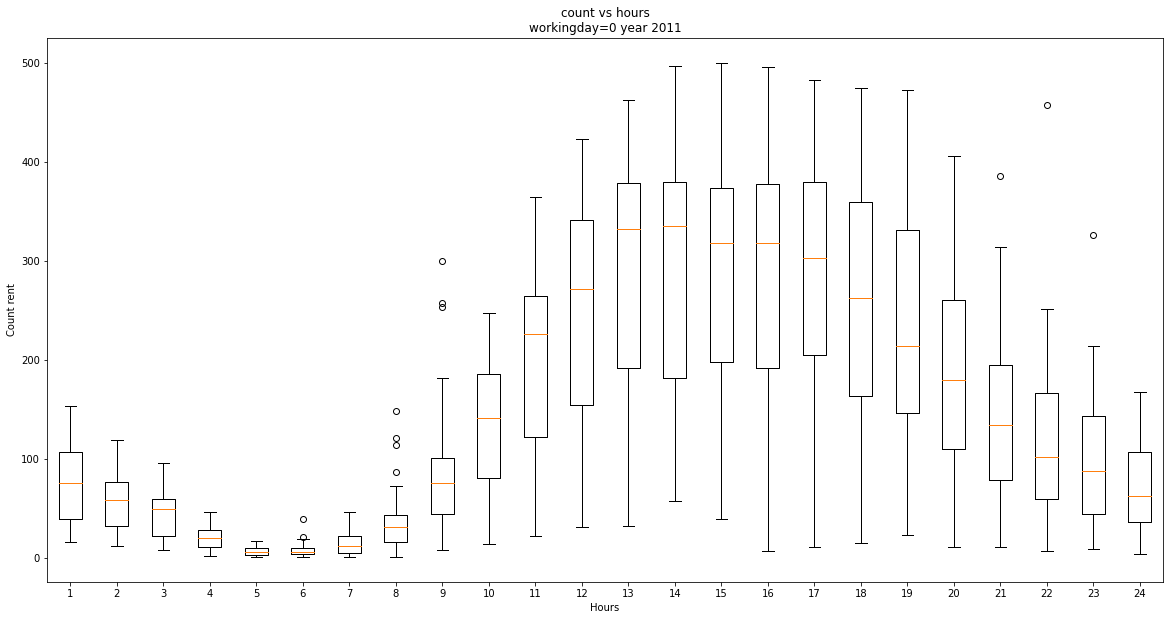

In [37]:
plot_hours(train[train.workingday == 0], year=2011, message='workingday=0 year 2011')

Text(0, 0.5, 'Average Rental Demand')

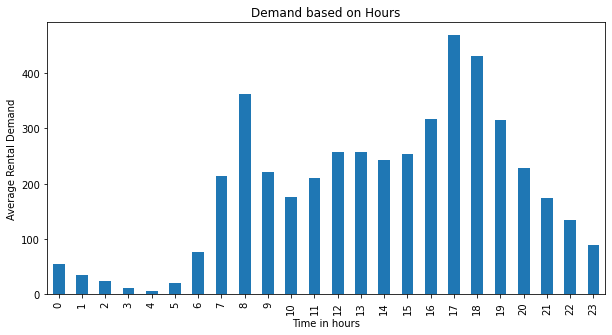

In [38]:
figure, axes = plt.subplots(figsize=(10,5))

hours = train.groupby(['hour']).agg("mean")["count"]
hours.plot(kind="bar", ax=axes)
plt.title("Demand based on Hours")
axes.set_xlabel("Time in hours")
axes.set_ylabel("Average Rental Demand")

<function matplotlib.pyplot.show(close=None, block=None)>

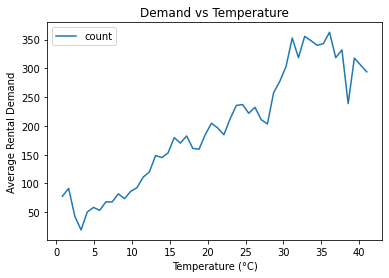

In [39]:
# Rental demand based on temperature

t = train.groupby('temp')[['count']].mean()
t.plot()
plt.xlabel("Temperature (°C)")
plt.ylabel("Average Rental Demand")
plt.title("Demand vs Temperature")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

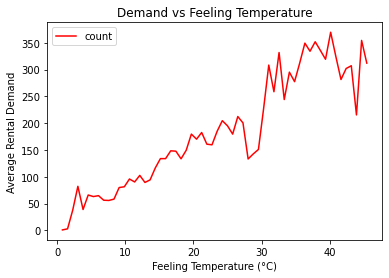

In [40]:
# Rental demand based on atemp
at = train.groupby('atemp')[['count']].mean()
at.plot(c='r')
plt.xlabel("Feeling Temperature (°C)")
plt.ylabel("Average Rental Demand")
plt.title("Demand vs Feeling Temperature")
plt.show

There is a strong relation between Demand and Temperature, Feeling Temperature.

### Feature Engineering

<AxesSubplot:>

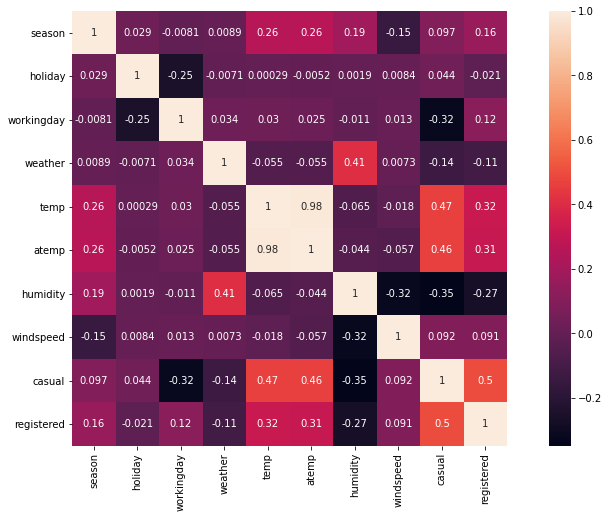

In [41]:
# Correlation matrix
corre_mat = train.iloc[:,[1,2,3,4,5,6,7,8,9,10]].corr()

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corre_mat, vmax=1, square=True, annot=True, ax =ax)

Strong positive relation between counts, registered and casual columns. Then we can remove them.

In [42]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [43]:
# Checking Multicollienarity computing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
train_scaled = scalar.fit_transform(train.drop(columns=['datetime']))

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(train_scaled,i) for i in range(train_scaled.shape[1])]
vif['Features'] = train.drop(columns=['datetime']).columns
vif

,VIF,Features
0,1.167426,season
1,1.074015,holiday
2,1.421690,workingday
3,1.251835,weather
4,35.612761,temp
5,35.684445,atemp
6,1.700012,humidity
7,1.200894,windspeed
8,inf,casual
9,inf,registered


The VIF values of temp and atemp columns are greater than 5 and then they are highly collinear with the other explanatory
variables. Then we can remove them.

In [44]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour'],
      dtype='object')

In [45]:
# Removing unnecesary columns
X = train.drop(columns=['datetime','temp', 'atemp', 'casual', 'registered', 'count'])
y = train['count']

test = test.drop(columns=['datetime','temp', 'atemp'])

In [46]:
# Scaling 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [47]:
#raise SystemExit("Stop right there!")

In [48]:
# The same scaling process for test dataset
test_scaled = scalar.fit_transform(test)
test_scaled

array([[-1.36852657, -0.17315012,  0.67684424, ..., -0.42117208,
         1.62088819, -1.67178498],
       [-1.36852657, -0.17315012,  0.67684424, ..., -0.42117208,
        -1.53113921, -1.52710892],
       [-1.36852657, -0.17315012,  0.67684424, ..., -0.42117208,
        -1.53113921, -1.38243286],
       ...,
       [-1.36852657, -0.17315012,  0.67684424, ..., -0.21383123,
        -0.19755792,  1.36641221],
       [-1.36852657, -0.17315012,  0.67684424, ..., -0.42117208,
        -0.44039641,  1.51108827],
       [-1.36852657, -0.17315012,  0.67684424, ...,  0.04534483,
        -0.44039641,  1.65576433]])

### Classification ML models

In [49]:
# Importing library models

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import r2_score

#### Linear Regession

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [52]:
lin_reg.score(X_train, y_train)

0.25447575957724844

In [53]:
lin_reg.score(X_test, y_test)  # There is no overfiting

0.24550146386747518

In [54]:
# adjusted R-Squared Error
def adj_r2(model,x,y):
    r2 = model.score(x,y)
    n = x.shape[0]  # number of rows
    p = x.shape[1]  # number of columns
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [55]:
adj_r2(lin_reg, X_test, y_test)

0.24388038045650906

The results are better with scaled results.

#### Lasso

In [56]:
# It returns the best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [57]:
# best alpha parameter for Lasso
alpha = lasscv.alpha_
alpha

0.007273635638337057

In [58]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.007273635638337057)

In [59]:
lasso_reg.score(X_test,y_test)

0.24550642567111203

In [60]:
adj_r2(lasso_reg, X_test, y_test)

0.24388535292086577

#### Ridge

In [61]:
# We use an array of random values to find the best alpha
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([2.42257377, 4.34110561, 7.08872403, 4.52884241, 5.24426182,
       4.47616787, 3.27766951, 3.96184197, 8.88479886, 9.65998064,
       8.38569933, 0.79076975, 1.81662736, 0.23209409, 0.17982575,
       7.75862951, 2.81310887, 9.65596745, 6.78470343, 2.75669182,
       9.31074099, 4.58737038, 0.48336797, 3.21791673, 1.76643919,
       3.45082393, 1.37308375, 7.17347865, 3.02509649, 9.20522221,
       0.09880434, 2.92595815, 9.16961941, 3.85136033, 7.43578021,
       0.95137177, 8.05779054, 1.77924991, 4.56270554, 7.34461161,
       9.19659025, 6.97158773, 2.57814047, 5.3855929 , 3.959954  ,
       3.27425515, 4.58764474, 2.18667774, 2.89957504, 3.7907177 ]),
        cv=10, normalize=True)

In [62]:
# best alpha
ridgecv.alpha_

0.09880433541846978

In [63]:
ridge_reg = Ridge(alpha=ridgecv.alpha_)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.09880433541846978)

In [64]:
ridge_reg.score(X_test, y_test)

0.24550169307093084

In [65]:
adj_r2(ridge_reg, X_test, y_test)

0.24388061015242157

#### Elastic Net

In [66]:
elasticCV = ElasticNetCV(alphas=None, cv=10)
elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10)

In [67]:
# best alpha
elasticCV.alpha_

0.14644415916790132

In [68]:
# l1_ratio gives how close the model is to L1 regularization
elasticCV.l1_ratio

0.5

In [69]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.14644415916790132)

In [70]:
elasticnet_reg.score(X_test, y_test)

0.24557602621054686

In [71]:
adj_r2(elasticnet_reg, X_test, y_test)

0.2439551030010545

Lasso, Ridge and Elactic Net algorithms obtain the same results as Linear Regression.

#### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree

dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [73]:
y_pred = dec_tree.predict(X_test)

In [74]:
dec_tree.score(X_test, y_test)

0.6346384104042084

In [75]:
adj_r2(dec_tree, X_test, y_test)

0.6338534100582384

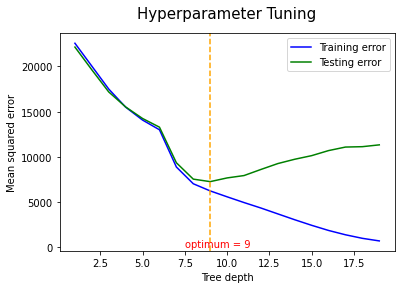

In [76]:
# Hyperparameter Tunning: Tree depth

from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []

for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []

for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=9, color='orange', linestyle='--')
plt.annotate('optimum = 9', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

The testing errors curve atarts to increase at depth=8. Then the optimum depth=8.

In [77]:
dec_tree = DecisionTreeRegressor(max_depth=8)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [78]:
y_pred = dec_tree.predict(X_test)

In [79]:
dec_tree.score(X_test, y_test)

0.7675722006595425

In [80]:
adj_r2(dec_tree, X_test, y_test)

0.7670728161919601

The score now is much better! R2 and adj-R2 are very similar, then the model is not being penalized by any feature.

In [81]:
# More Hyperparamter Tunning 
grid_param = {
    'criterion': ["mse"],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']  
}

grid_search = GridSearchCV(dec_tree, param_grid=grid_param, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=8), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [82]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 18,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'splitter': 'random'}

In [93]:
dec_tree_hyp = DecisionTreeRegressor(criterion='mse',
                                     max_depth=18,
                                     min_samples_leaf=8,
                                     min_samples_split=5,
                                     splitter='random')
dec_tree_hyp.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=8, min_samples_split=5,
                      splitter='random')

In [94]:
dec_tree_hyp.score(X_test, y_test)

0.7409875693814822

In [95]:
adj_r2(dec_tree_hyp, X_test, y_test)

0.7404310663077163

The Hyperparameters Tunning helps a lot to increase the regression score.

#### Randon Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
rand_for.score(X_train, y_train)

0.9660619049018225

In [88]:
rand_for.score(X_test, y_test)

0.7752277051054057

In [89]:
adj_r2(rand_for, X_test, y_test)

0.7747447689285296

There is overfitting: quite a lot of difference between training and test scores.

In [90]:
# Hyperparameter tunning run in Google Colab to safe computing time

grid_param = {'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

#grid_search = GridSearchCV(rand_for, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
#grid_search.fit(X_train, y_train)

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [91]:
#grid_search.best_params_

In [92]:
rand_for_hyp = RandomForestRegressor(criterion='gini',
                                    max_depth=8,
                                    max_features = 'log2',
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    n_estimators=90)
rand_for_hyp.fit(X_train, y_train)

KeyError: 'gini'

In [ ]:
rand_for_hyp.score(X_test, y_test)

In [ ]:
adj_r2(rand_for, X_train, y_train)

#### KNN

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
knn.score(X_train, y_train)

0.7762082075391994

In [98]:
knn.score(X_test, y_test)

0.6236471061357104

There is as well overgitting!

In [99]:
# Hyperparameter tunning
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

grid_search = GridSearchCV(knn, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=1)

In [100]:
grid_search.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 25, 'n_neighbors': 5}

In [101]:
knn = KNeighborsRegressor(algorithm='kd_tree',
                         leaf_size=25,
                         n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=25)

In [102]:
knn.score(X_test, y_test)

0.6245431224175952

Apparently, there is no improvement tunning the hyperparameters.

#### Support Vectors Machines

In [103]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [104]:
y_pred = svm.predict(X_test)
y_pred

array([161.56121853, 146.66313777, 170.2389167 , ..., 121.44045939,
       192.51187999, 133.47788181])

In [105]:
svm.score(X_train, y_train)

0.272241619203509

In [106]:
svm.score(X_test, y_test)

0.2645045986323258

In [107]:
# Hyperparameter tunning
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

grid_search = GridSearchCV(svm, param_grid, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=1)

In [108]:
grid_search.best_params_

{'C': 500, 'gamma': 1}

In [109]:
svm = SVR(C=500, gamma=1)
svm.fit(X_train, y_train)

SVR(C=500, gamma=1)

In [110]:
svm.score(X_test, y_test)

0.6358724598234158

In [111]:
svm.score(X_train, y_train)  # there is overfitting

0.7477446297605461

In [112]:
adj_r2(svm, X_test, y_test)

0.6350901109034538

### Accuracy Results

In [113]:
results = pd.DataFrame()
results['Model'] = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet',
                    'Decision Tree', 'Random Forest','KNN', 'SVM']
results['R2'] = [lin_reg.score(X_test, y_test), lasso_reg.score(X_test, y_test),
                       ridge_reg.score(X_test, y_test), elasticnet_reg.score(X_test, y_test),
                       dec_tree.score(X_test, y_test),rand_for.score(X_test, y_test),
                       knn.score(X_test, y_test),svm.score(X_test, y_test)]
results['R2-adj'] = [adj_r2(lin_reg, X_test, y_test), adj_r2(lasso_reg, X_test, y_test),
                    adj_r2(ridge_reg, X_test, y_test), adj_r2(elasticnet_reg, X_test, y_test),
                    adj_r2(dec_tree, X_test, y_test), adj_r2(rand_for, X_test, y_test),
                    adj_r2(knn, X_test, y_test), adj_r2(svm, X_test, y_test)]
results

,Model,R2,R2-adj
0,Linear Regression,0.245501,0.243880
1,Lasso,0.245506,0.243885
2,Ridge,0.245502,0.243881
3,ElasticNet,0.245576,0.243955
4,Decision Tree,0.767572,0.767073
5,Random Forest,0.775228,0.774745
6,KNN,0.624543,0.623736
7,SVM,0.635872,0.635090


Random Forest and Decision Tree seems to be the best models for this particular dataset.

In [115]:
# Save the best model for production
import pickle

with open('classificationModel.sav', 'wb') as f:
    pickle.dump(rand_for, f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)